In [20]:
import glob
import json
import os
import numpy as np

train_files = [f for f in glob.glob("training/*.json")]
test_files = [f for f in glob.glob("testing/*.json")]

def read_file(fn):
    with open(fn) as f:
        j = json.load(f)
        X = np.array(j['payload']['values'])
        _, y = os.path.split(fn)
        y = y.split('.')[0]
        fs = 1000.0 / j['payload']['interval_ms']

        return X, y, fs



In [58]:
!pip3 install numpy matplotlib sklearn peakutils

import sys
sys.path.append('../')

from dsp import generate_features

  Using cached PeakUtils-1.3.3-py3-none-any.whl (7.7 kB)
You should consider upgrading via the '/Users/yanli/.pyenv/versions/3.10.4/bin/python3.10 -m pip install --upgrade pip' command.


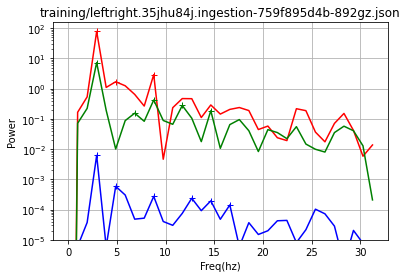

In [81]:
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import peakutils

#matplotlib.use('agg')
colors = ['r', 'g', 'b', 'c', 'm', 'y']

fn = train_files[8]
X, y, fs = read_file(fn)

fig, ax = plt.subplots()
max_power = 10
for dim in range(0, 3): 
    freqs, spec_powers = signal.periodogram(X[:,dim], fs, nfft=64)    
    peaks = peakutils.indexes(spec_powers, thres=0.02)
    
    ax.plot(freqs, (spec_powers), colors[dim])    
    ax.plot(freqs[peaks], spec_powers[peaks], colors[dim]+'+')

    #ax.bar(freqs, spec_powers, edgecolor=colors[dim], facecolor=colors[dim], alpha=0.4)
    
    max_power = max(max_power, max(spec_powers))

plt.ylim([1e-5, max_power * 2])
ax.set_yscale('log')
ax.grid()    
plt.xlabel("Freq(hz)")
plt.ylabel("Power")
plt.title(fn)

plt.savefig(test_files[3]+'.svg')
plt.show()